## **Objective**:
Perform an advanced analysis on the Titanic dataset, focusing on feature engineering, predictive modeling, and deriving actionable insights. This project aims to test advanced skills in data preprocessing, feature engineering, model tuning, and interpretation of results.

## **Dataset**:
Use the Titanic dataset. The dataset includes information on passengers such as age, gender, class, and whether they survived.

## **Task Breakdown**
## **Data Exploration and Cleaning**:

1.   Load the dataset.
2.   Perform a comprehensive exploratory data analysis (EDA).
3.   Handle missing values, outliers, and data inconsistencies


## **Feature Engineering**:

1. Create complex features (e.g., family size, title extraction from names).
2. Apply statistical techniques for feature transformation.
3. Perform feature interaction analysis.

## **Predictive Modeling with Advanced Techniques**:

1. Implement and tune advanced machine learning models (e.g., Gradient Boosting, XGBoost).
2. Use cross-validation and hyperparameter tuning for model optimization.
3. Evaluate models using advanced metrics (e.g., ROC AUC, F1 Score).

## **Model Interpretation and Explainability**:

4. Use model interpretability tools (e.g., SHAP) to explain model predictions.
5. Identify and visualize the most important features influencing survival predictions.

## **Model Deployment**:

### **Solution Outline**

#### **Step 1: Data Exploration and Cleaning**

##### **Import important libraries**

In [298]:
import os
import json

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder

# Setting the aesthetics for the plots
sns.set(style="whitegrid")

DATA_PATH = os.getenv("DATA_PATH", default="data/titanic-training-data.csv")

##### **Load dataset and display first few rows of teh dataset**

In [299]:
# Load the dataset
data = pd.read_csv(DATA_PATH)

# Confirm the dataset is loaded
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [300]:
# Write the columns to a configuration file
COLUMN_CONFIG = os.getenv("COLUMN_CONFIG", default="config/columns.json")
with open(COLUMN_CONFIG, "w") as f:
    # Convert the columns to json and write to the file
    columns = {col: data[col].dtype.name for col in data.columns if col != "PassengerId"}
    json.dump(columns, f)


##### **Exploratory Data analysis**

In [301]:
# Check the dimension of the data
data.shape

(891, 12)

The given dataset has `891` rows and `12` columns.

In [302]:
# Check the basic information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


From the result above, we can see that most of the features have a non-null count of `891`, which corresponds with the number of rows, except features like `Age`, `Cabin`, and `Embarked`. This means that we might have to investigate some of these features further.

In [303]:
# Get the count of missing values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [304]:
# Check the statistical description of numerical features
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##### Numerical Data:

- Survived: About 38.4% of passengers survived, based on the mean of the Survived column.

- Pclass: The majority of passengers were in 3rd class.

- Age: The average age is approximately 29.7 years, with ages ranging from less than a year to 80 years.

- SibSp (Siblings/Spouses aboard) and Parch (Parents/Children aboard): Most passengers did not have siblings, spouses, parents, or children aboard.

- Fare: Fares varied significantly, with a mean of $32.20, but ranging up to $512.33.


In [305]:
# Check the statistical description of categorical features
data.describe(include="object")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


##### Categorical Data:

- Name: Each passenger has a unique name entry.

- Sex: There are more males (577) than females on board.

- Ticket: There are a large number of unique ticket numbers, indicating many different tickets were issued. Some ticket numbers are duplicated, possibly indicating shared tickets among families or groups.

- Cabin: Many passengers do not have cabin data (missing data for 687 out of 891 entries), and there are several passengers per cabin among those listed.

- Embarked: Most passengers embarked from Southampton ('S'), followed by Cherbourg ('C') and Queenstown ('Q').



In [306]:
# Set the PassengerId as the index
data.set_index("PassengerId", inplace=True)

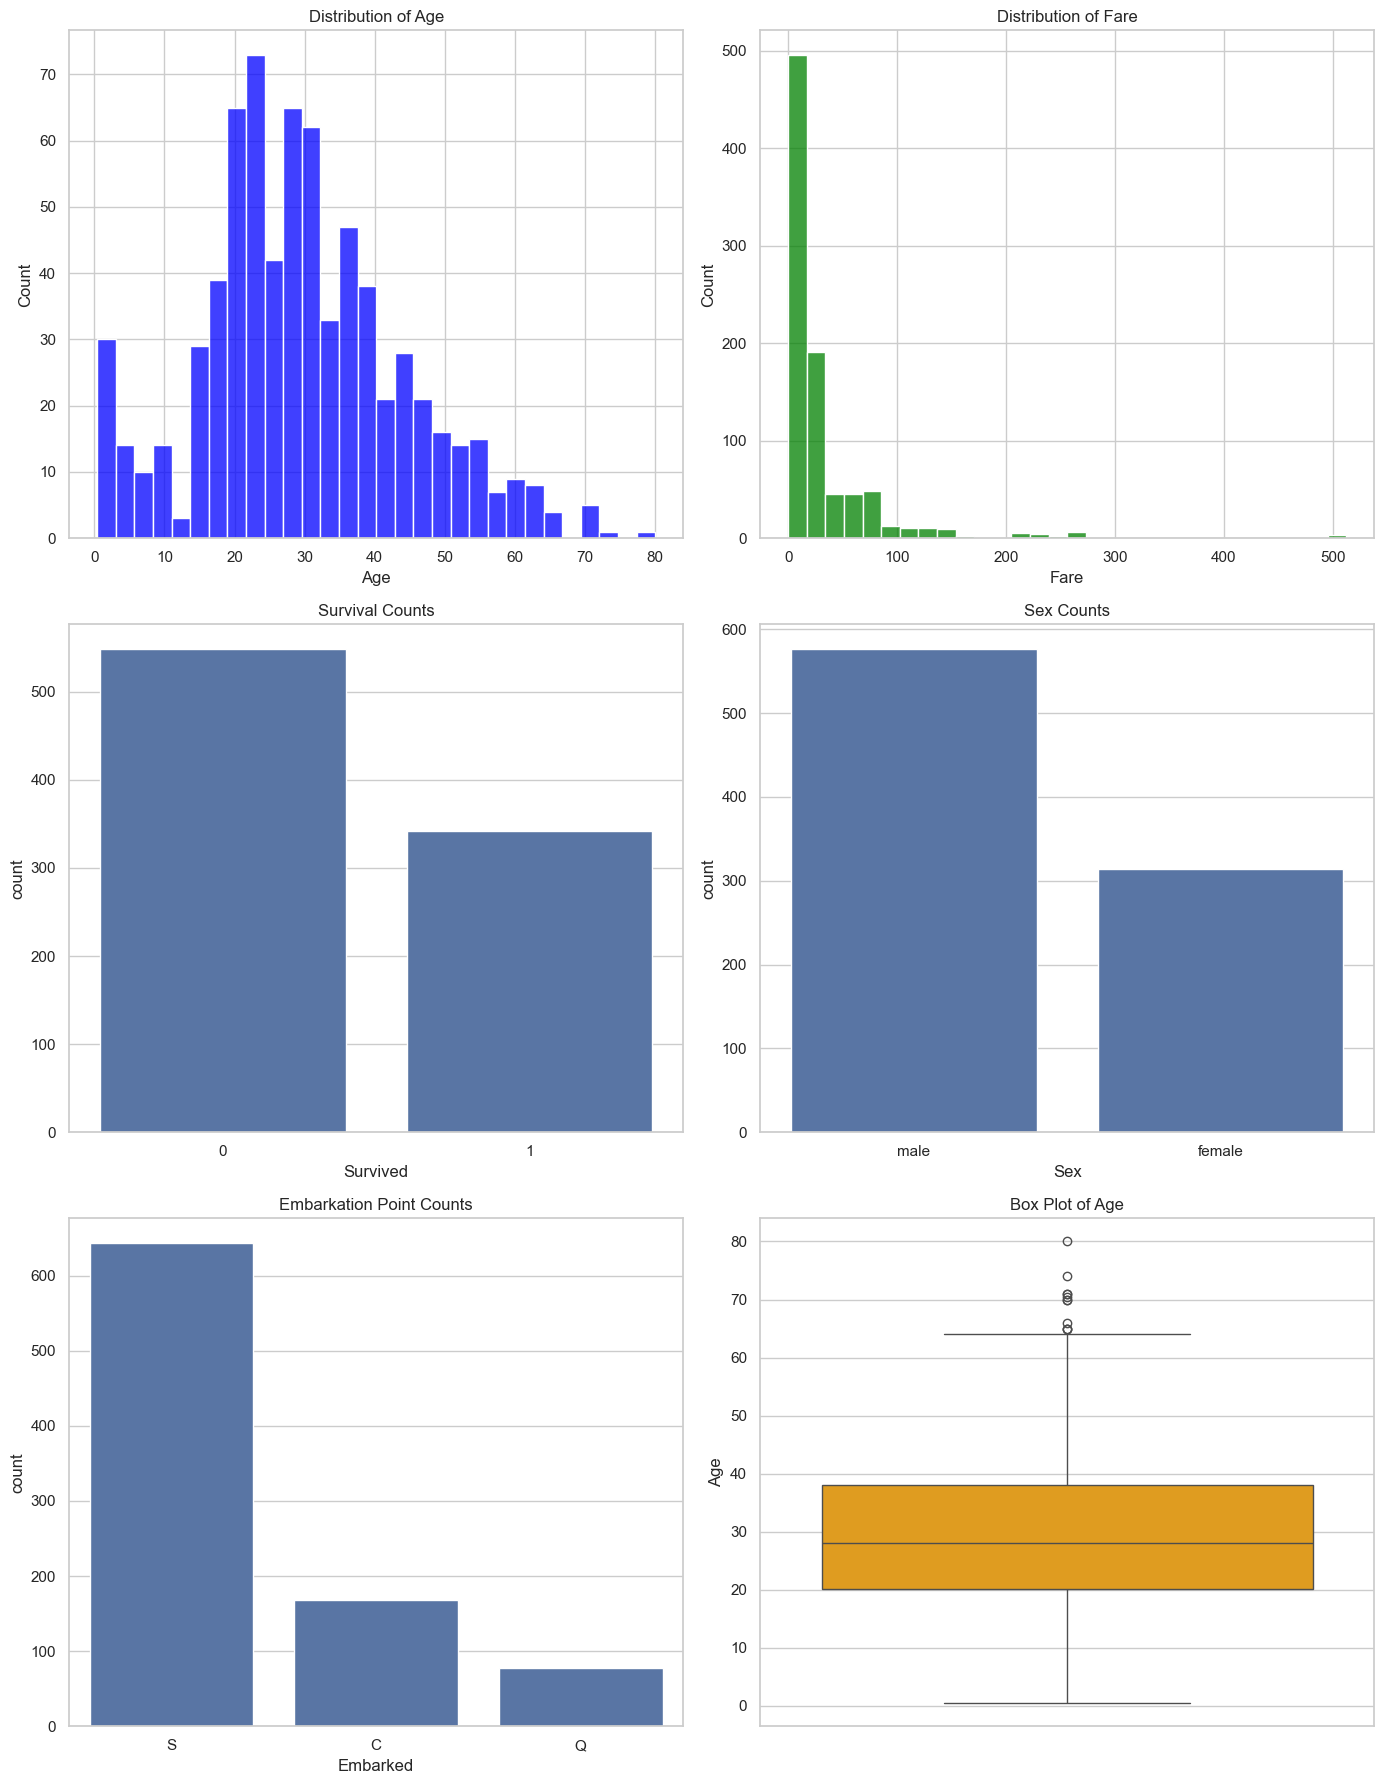

In [307]:
# Create a figure to hold the visualizations
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 18))

# Histogram of Age
sns.histplot(data['Age'].dropna(), bins=30, ax=axes[0, 0], kde=False, color='blue')
axes[0, 0].set_title('Distribution of Age')

# Histogram of Fare
sns.histplot(data['Fare'], bins=30, ax=axes[0, 1], kde=False, color='green')
axes[0, 1].set_title('Distribution of Fare')

# Bar chart of Survival
sns.countplot(x='Survived', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Survival Counts')

# Bar chart of Sex
sns.countplot(x='Sex', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Sex Counts')

# Bar chart of Embarked
sns.countplot(x='Embarked', data=data, ax=axes[2, 0])
axes[2, 0].set_title('Embarkation Point Counts')

# Box plot for Age to check outliers
sns.boxplot(y='Age', data=data, ax=axes[2, 1], color='orange')
axes[2, 1].set_title('Box Plot of Age')

plt.tight_layout()
plt.show()

##### Visualizations Summary

- **Distribution of Age**: The age distribution is slightly right-skewed, with a concentration of passengers between 20 and 40 years old.

- **Distribution of Fare**: The fare distribution is highly skewed to the right, indicating most fares are low with a few very high outliers (luxury accommodations).

- **Survival Counts**: More passengers did not survive (around 550) than those who did (around 340).

- **Sex Counts**: There are significantly more males (around 580) than females (around 310) on board.

- **Embarkation Point Counts**: Most passengers embarked at Southampton (S), followed by Cherbourg (C) and a smaller number from Queenstown (Q).

- **Box Plot of Age**: The box plot for age shows a fairly normal distribution with a few outliers for older passengers.

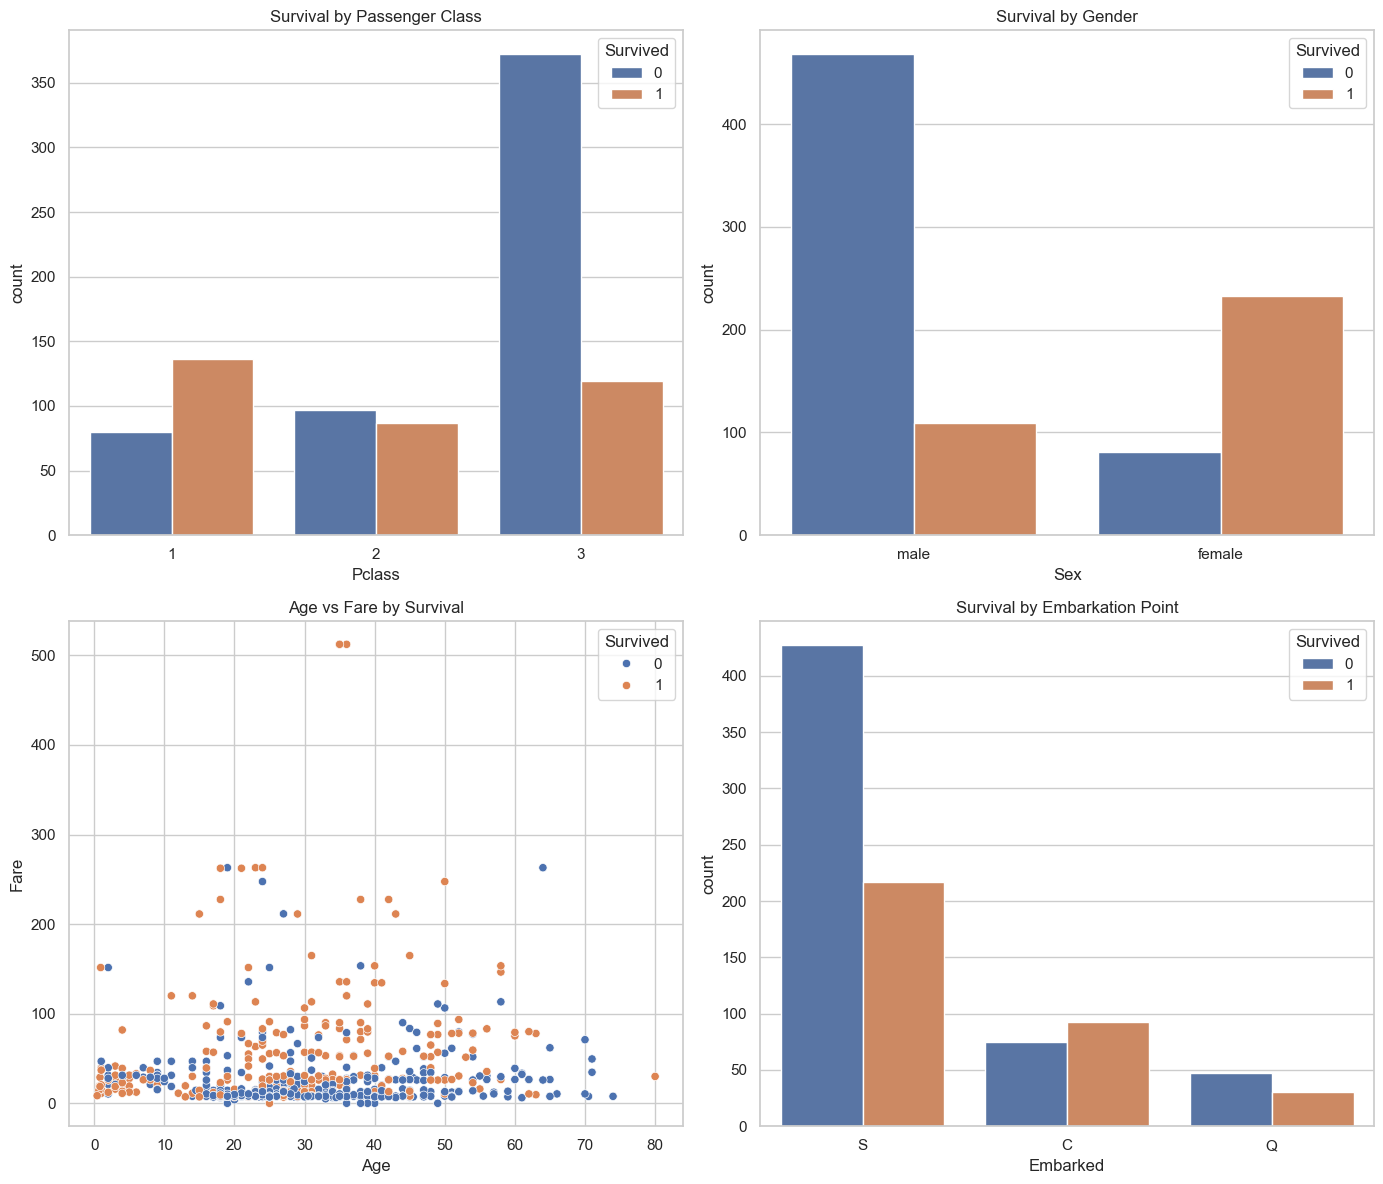

In [308]:
# Create a figure to hold the multivariate visualizations
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))

# Relationship between Pclass and Survival
sns.countplot(x='Pclass', hue='Survived', data=data, ax=axes[0, 0])
axes[0, 0].set_title('Survival by Passenger Class')
axes[0, 0].legend(title='Survived')

# Impact of Gender on Survival
sns.countplot(x='Sex', hue='Survived', data=data, ax=axes[0, 1])
axes[0, 1].set_title('Survival by Gender')
axes[0, 1].legend(title='Survived')

# Interaction between Age and Fare in relation to Survival
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Age vs Fare by Survival')
axes[1, 0].legend(title='Survived')

# Relationship between Embarked and Survival
sns.countplot(x='Embarked', hue='Survived', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Survival by Embarkation Point')
axes[1, 1].legend(title='Survived')

plt.tight_layout()
plt.show()

##### Multivariate Analysis Summary

- **Survival by Passenger Class**
    - First Class: Higher survival rate.
    - Third Class: Lower survival rate, indicating a clear disadvantage compared to other classes.

- **Survival by Gender**
    - Females have a significantly higher survival rate than males, suggesting that gender played a critical role in survival chances.

- **Age vs. Fare by Survival**
    - There's a spread of ages and fares, with no distinct pattern at first glance. However, higher fare passengers (likely first class) show a slightly better survival rate, and they also tend to be spread across a wider age range.

- **Survival by Embarkation Point**
    - Passengers who embarked at Cherbourg (C) have a higher survival rate compared to those from Southampton (S) and Queenstown (Q).


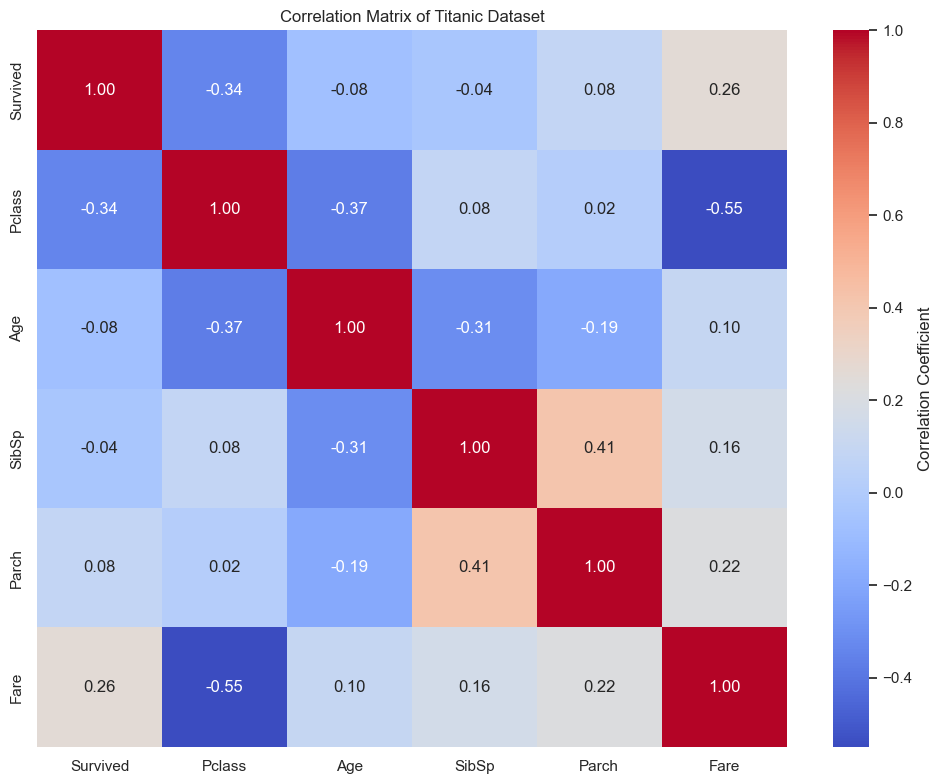

In [309]:
# Calculate the correlation matrix
correlation_matrix = data.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix of Titanic Dataset')
plt.tight_layout()
plt.show();


##### Correlation Insights

- **Survived & Pclass**: There's a negative correlation (-0.34), indicating that higher classes (lower Pclass numbers) had better survival rates.

- **Survived & Fare**: A positive correlation (0.26) suggests that passengers who paid higher fares had better chances of survival.

- **Pclass & Fare**: Negative correlation (-0.55) shows that higher classes (which are numerically lower) are associated with higher fares.

- **Age & Pclass**: Also negatively correlated (-0.37), indicating younger passengers tended to be in lower classes.

- **SibSp & Parch**: A moderate positive correlation (0.41) indicates that passengers with siblings/spouses aboard were likely to also have parents/children aboard.


##### **Handling Missing values and dropping non-useful columns**

In [310]:
# Impute missing Age values by median Age grouped by Pclass
data['Age'] = data.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.median()))

# For Cabin, create a new column indicating whether cabin information is available
data['Cabin_Ind'] = 0
data.loc[data['Cabin'].notnull(), 'Cabin_Ind'] = 1

# Impute missing Embarked values with the mode (most common value)
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

# Confirm changes by displaying the count of missing values per column
data.isnull().sum()


Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin        687
Embarked       0
Cabin_Ind      0
dtype: int64

- **Age**: Missing values have been imputed using the median age grouped by passenger class.

- **Cabin**: A new indicator column `Cabin_Ind` has been added to denote whether cabin information was originally provided (1 for present, 0 for missing). The original `Cabin` column still contains missing values.

- **Embarked**: Missing values have been filled with the most common embarkation point ('S').

In [311]:
# For Fare outliers, cap fares at the 95th percentile
fare_cap = data['Fare'].quantile(0.95)
data['Fare'] = data['Fare'].clip(upper=fare_cap)

# Display updates
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Ind
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


- **Fare**: Outliers in the `Fare` column have been capped at the 95th percentile to reduce the impact of extreme values.

#### **Step 2: Feature Engineering**

##### **Encode sex, Male =1, Female =0**

In [312]:
# Encode sex feature
data["Sex"] = data["Sex"].map(
    {
        "male": 1,
        "female": 0,
    }
)

data["Sex"]

PassengerId
1      1
2      0
3      0
4      0
5      1
      ..
887    1
888    0
889    0
890    1
891    1
Name: Sex, Length: 891, dtype: int64

##### **Encode Embarked**

##### **OneHotEncoding of Embarked**

In [313]:
# One-Hot Encoding of 'Embarked'
embarked_dummies = pd.get_dummies(data['Embarked'], prefix='Embarked')


In [314]:
# Write the encoded columns to a configuration file
EMBARKED_CONFIG = os.getenv("EMBARKED_CONFIG", default="config/embarked.json")
with open(EMBARKED_CONFIG, "w") as f:
    # Convert the columns to json and write to the file
    columns = {str(col).split("_")[-1]: col for col in embarked_dummies.columns}
    json.dump(columns, f)

##### **Drop non used columns and merge data**

In [315]:
# Concatenate the new dummy variables to the main dataframe
data = pd.concat([data, embarked_dummies], axis=1)

In [316]:
# Feature 1: Extract titles from names
data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Display the unique titles
data['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [317]:
# Feature 2: Create family size feature
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

# Feature 3: Create a feature for solo travellers
data['IsAlone'] = 0
data.loc[data['FamilySize'] == 1, 'IsAlone'] = 1

# Display the updated dataset
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Ind,Embarked_C,Embarked_Q,Embarked_S,Title,FamilySize,IsAlone
PassengerId,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,False,False,True,Mr,2,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1,True,False,False,Mrs,2,0
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,False,False,True,Miss,1,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,1,False,False,True,Mrs,2,0
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0,False,False,True,Mr,1,1


In [318]:
# Feature 4: Categorize age into groups
bins = [0, 12, 20, 40, 60, 80, float('inf')]
labels = ['Child', 'Teen', 'Adult', 'Middle-aged', 'Senior', "Over-aged"]
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Display the updated dataset
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Ind,Embarked_C,Embarked_Q,Embarked_S,Title,FamilySize,IsAlone,AgeGroup
PassengerId,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,False,False,True,Mr,2,0,Adult
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1,True,False,False,Mrs,2,0,Adult
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,False,False,True,Miss,1,1,Adult
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,1,False,False,True,Mrs,2,0,Adult
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0,False,False,True,Mr,1,1,Adult


In [319]:
# Feature 5: Calculate fare per person
data['FarePerPerson'] = data['Fare'] / data['FamilySize']

# Display the updated dataset
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Ind,Embarked_C,Embarked_Q,Embarked_S,Title,FamilySize,IsAlone,AgeGroup,FarePerPerson
PassengerId,,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,False,False,True,Mr,2,0,Adult,3.62500
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1,True,False,False,Mrs,2,0,Adult,35.64165
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,False,False,True,Miss,1,1,Adult,7.92500
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,1,False,False,True,Mrs,2,0,Adult,26.55000
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0,False,False,True,Mr,1,1,Adult,8.05000


In [320]:
# Dropping non-used columns
columns_to_drop = ['Name', 'Ticket', 'Cabin', 'Embarked', 'Fare']
data = data.drop(columns=columns_to_drop)

# Display the modified dataframe
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin_Ind,Embarked_C,Embarked_Q,Embarked_S,Title,FamilySize,IsAlone,AgeGroup,FarePerPerson
PassengerId,,,,,,,,,,,,,,,
1,0,3,1,22.0,1,0,0,False,False,True,Mr,2,0,Adult,3.62500
2,1,1,0,38.0,1,0,1,True,False,False,Mrs,2,0,Adult,35.64165
3,1,3,0,26.0,0,0,0,False,False,True,Miss,1,1,Adult,7.92500
4,1,1,0,35.0,1,0,1,False,False,True,Mrs,2,0,Adult,26.55000
5,0,3,1,35.0,0,0,0,False,False,True,Mr,1,1,Adult,8.05000


##### Rationale for dropping features

- `Name`, `Ticket`, and `Cabin`: they are either too unique or have too many missing values

- `Embarked`: it is now encoded by features prefixed with `Embarked_`

- `Fare`: it has  been normalized to `FarePerPerson`

##### **EDA pairplot**

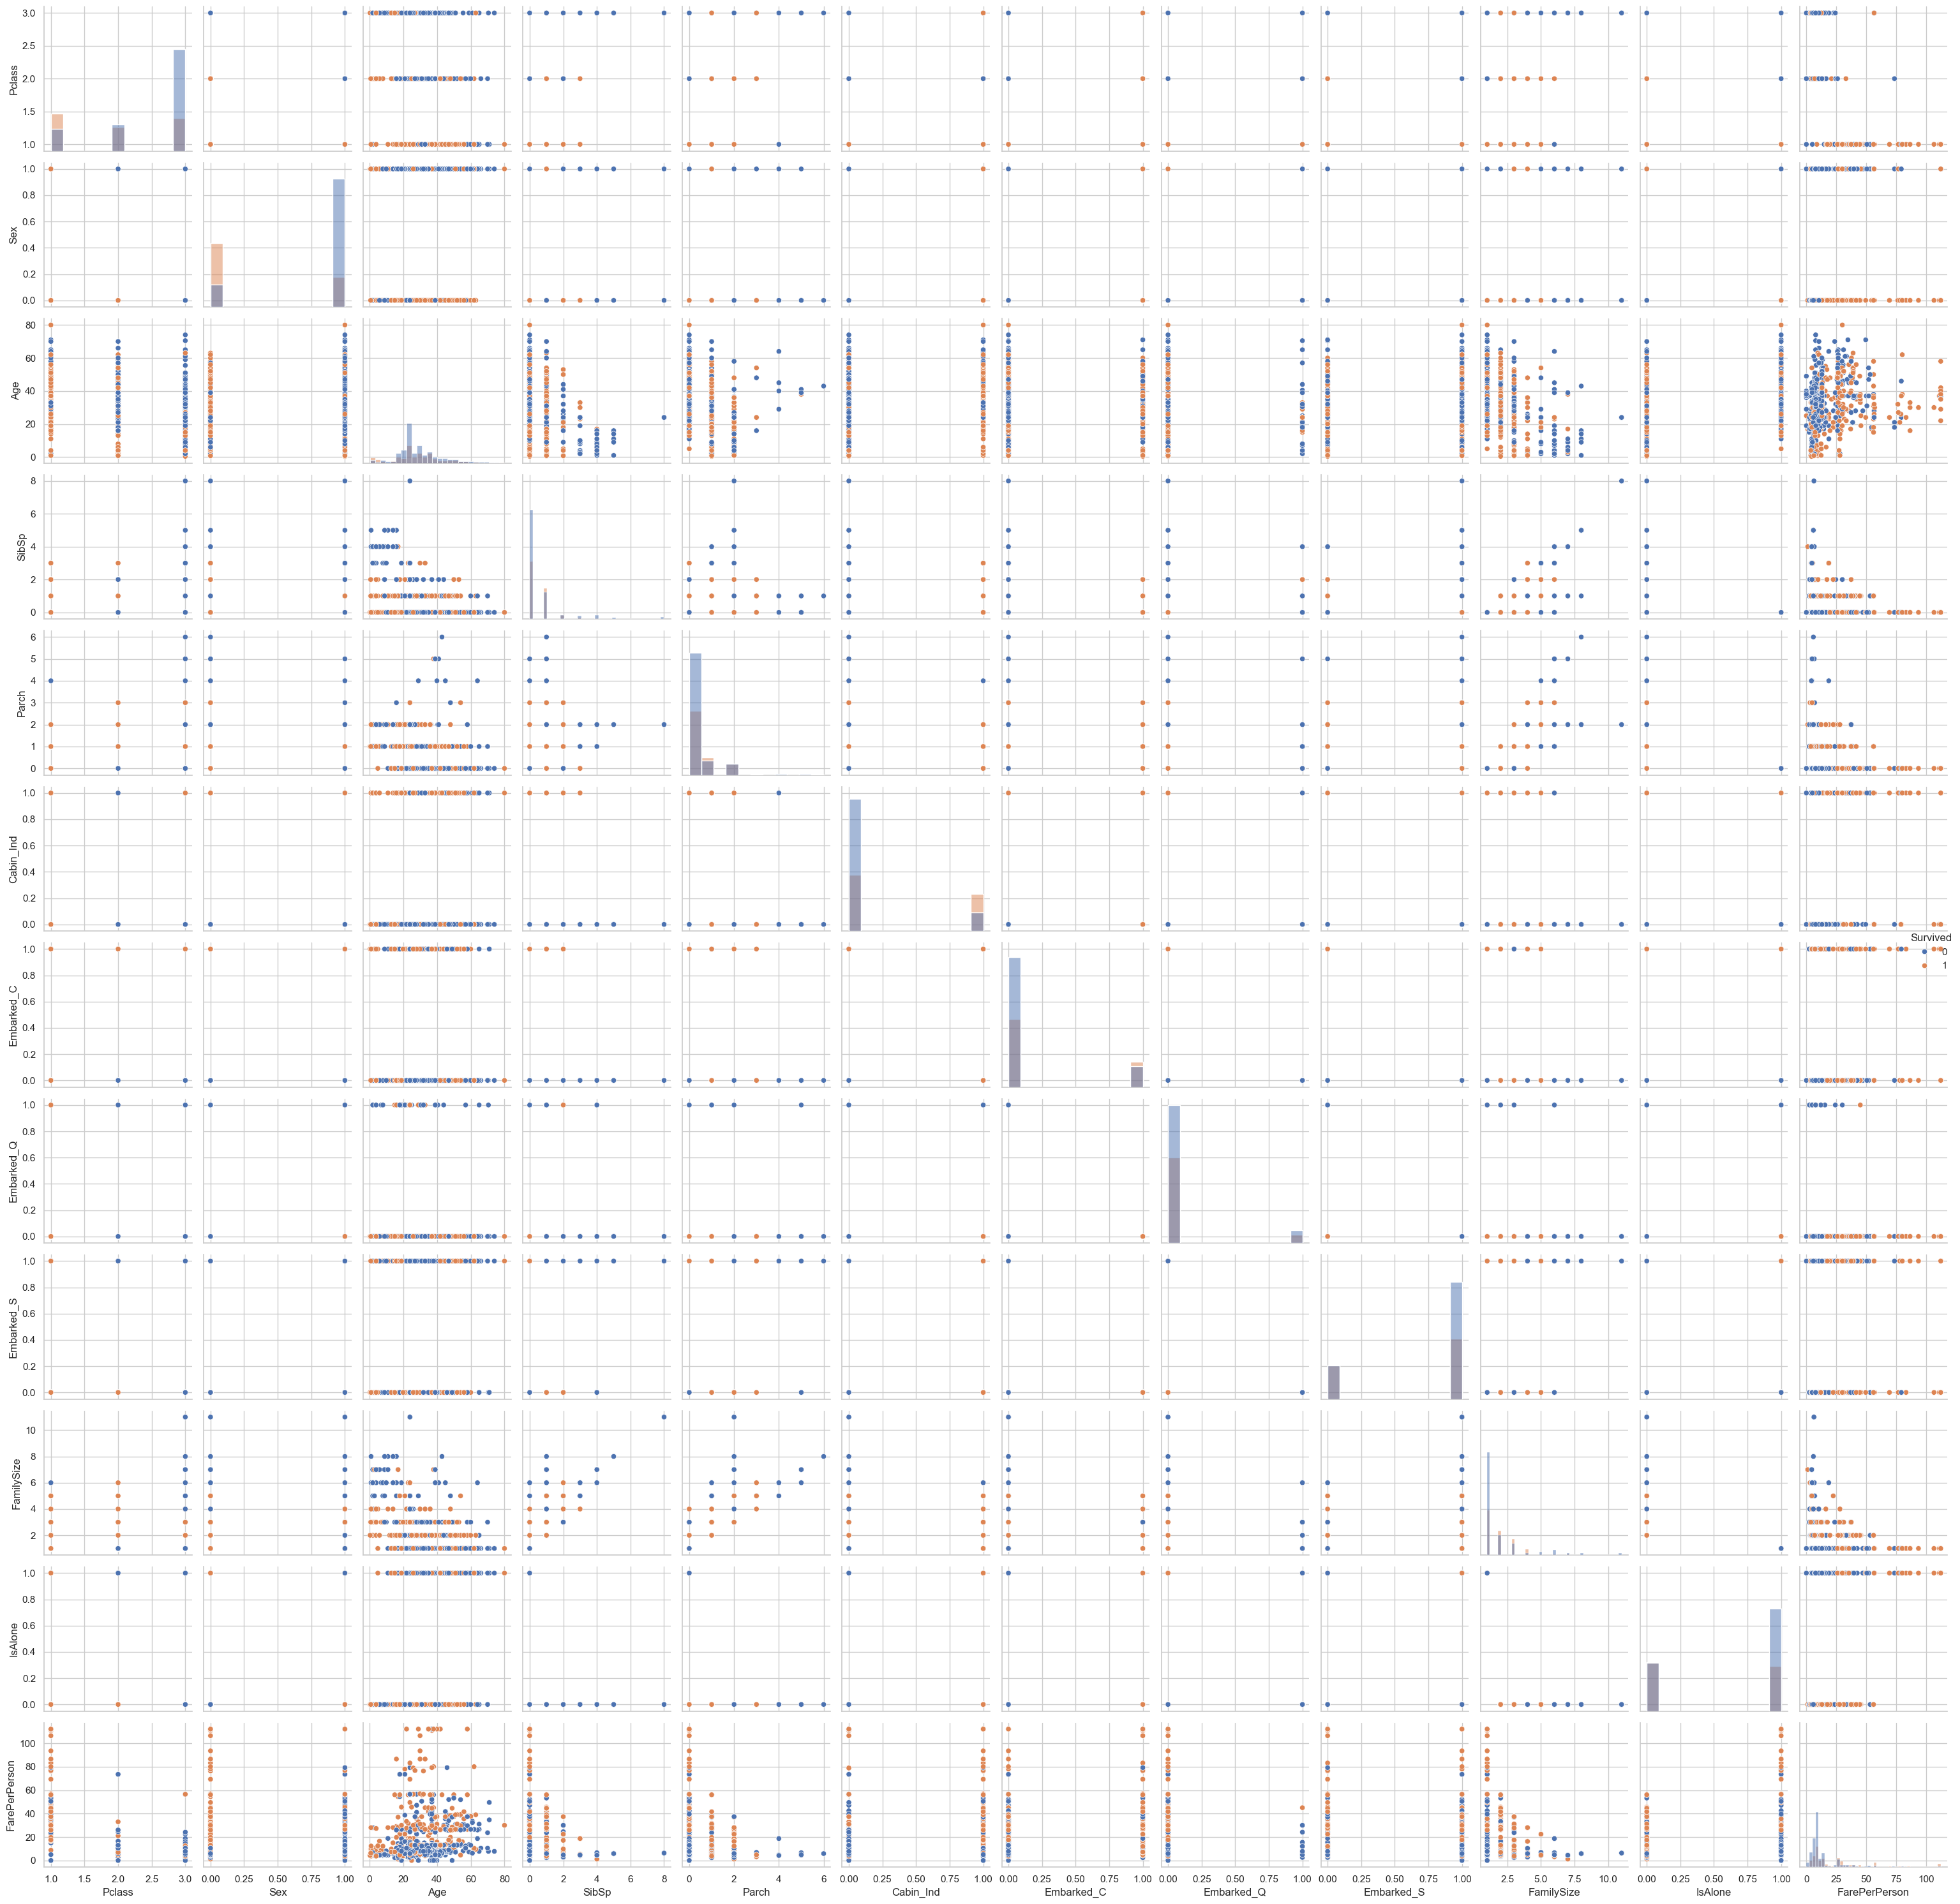

In [321]:
# Plot the pairplot of the dataset
sns.pairplot(data, hue='Survived', diag_kind='hist')

plt.tight_layout()
plt.show();

##### **Heatmap for correlation matrix**

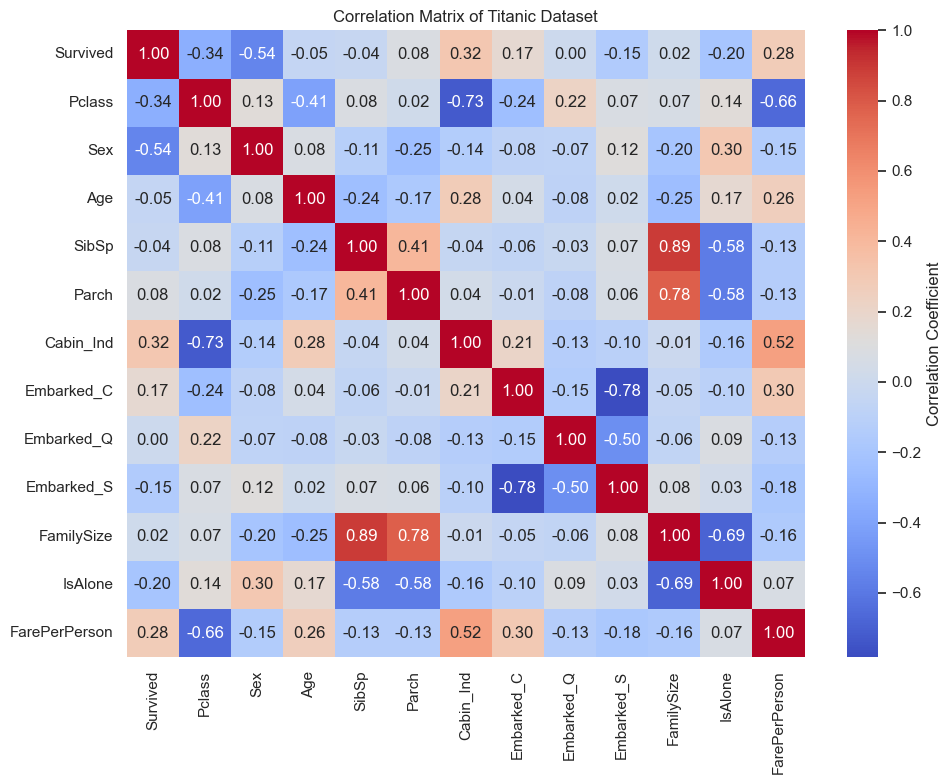

In [322]:
# Plot the correlation matrix and heatmap
correlation_matrix = data.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix of Titanic Dataset')
plt.tight_layout()
plt.show();

Since some of the features still contain non-numeric data, specifically the 'Title' and 'AgeGroup' columns, we need to be encode or handled them before we can proceed with modeling.

In [323]:
# One-Hot Encoding for 'Title' and 'AgeGroup'
title_dummies = pd.get_dummies(data['Title'], prefix='Title')
age_group_dummies = pd.get_dummies(data['AgeGroup'], prefix='AgeGroup')

# Concatenate these new dummy variables to the training features
data_encoded = pd.concat([data.drop(['Title', 'AgeGroup'], axis=1), title_dummies, age_group_dummies], axis=1)

# Add AgeGroup_Over-aged column if it does not exist
if 'AgeGroup_Over-aged' not in data_encoded.columns:
    data_encoded['AgeGroup_Over-aged'] = 0

In [324]:
# Write the encoded columns to a configuration file
TITLE_CONFIG = os.getenv("TITLE_CONFIG", default="config/title.json")
AGE_GROUP_CONFIG = os.getenv("AGE_GROUP_CONFIG", default="config/age_group.json")

with open(TITLE_CONFIG, "w") as f:
    # Convert the columns to json and write to the file
    columns = {str(col).split("_")[-1]: col for col in title_dummies.columns}
    json.dump(columns, f)

with open(AGE_GROUP_CONFIG, "w") as f:
    # Convert the columns to json and write to the file
    columns = {str(col).split("_")[-1]: col for col in age_group_dummies.columns}
    json.dump(columns, f)


In [334]:
data_encoded.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin_Ind,Embarked_C,Embarked_Q,Embarked_S,...,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,AgeGroup_Child,AgeGroup_Teen,AgeGroup_Adult,AgeGroup_Middle-aged,AgeGroup_Senior,AgeGroup_Over-aged
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,1,22.0,1,0,0,False,False,True,...,False,False,False,False,False,False,True,False,False,False
2,1,1,0,38.0,1,0,1,True,False,False,...,True,False,False,False,False,False,True,False,False,False
3,1,3,0,26.0,0,0,0,False,False,True,...,False,False,False,False,False,False,True,False,False,False
4,1,1,0,35.0,1,0,1,False,False,True,...,True,False,False,False,False,False,True,False,False,False
5,0,3,1,35.0,0,0,0,False,False,True,...,False,False,False,False,False,False,True,False,False,False


####  **Step 3:Predictive modeling**

##### **Create up to three differente models and use Use Voting Method to get the final ensemble model**

In [326]:
# Import important libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

import xgboost

# Define X,y
X = data_encoded.drop('Survived', axis=1)  # Features
y = data_encoded['Survived']  # Target variable

In [327]:
# Write the columns for the training data to a configuration file
TRAINING_COLUMNS_CONFIG = os.getenv("TRAINING_COLUMNS_CONFIG", default="config/training_columns.json")
with open(TRAINING_COLUMNS_CONFIG, "w") as f:
    # Convert the columns to json and write to the file
    columns = {col: data_encoded[col].dtype.name for col in data_encoded.columns if col != "Survived"}
    json.dump(columns, f)

In [328]:

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



#model 1
logreg = LogisticRegression(max_iter=500)

#model 2
random_forest = RandomForestClassifier(n_estimators=100)

#Ensemble model
gradient_boosting = GradientBoostingClassifier(n_estimators=100)


#Predict and Evaluate models
# Function to perform cross-validation and evaluate models
def evaluate_model(model, X, y, scoring='accuracy'):
    model.fit(X, y)
    scores = cross_val_score(model, X, y, cv=5, scoring=scoring)
    return model, np.mean(scores), np.std(scores)

# Evaluate each model
logreg, logreg_accuracy, logreg_std = evaluate_model(logreg, X_train, y_train)
random_forest, rf_accuracy, rf_std = evaluate_model(random_forest, X_train, y_train)
gradient_boosting, gb_accuracy, gb_std = evaluate_model(gradient_boosting, X_train, y_train)

####  **Step 4:Model Interpretation using shap**

In [329]:
# Check if the SHAP library is installed and its version, or install it if it's not available
import pkg_resources

try:
    shap_version = pkg_resources.get_distribution(dist="shap").version
    shap_installed = True
except pkg_resources.DistributionNotFound:
    shap_installed = False
    # Install SHAP if not already installed
    !pip install shap

if shap_installed:
    import shap

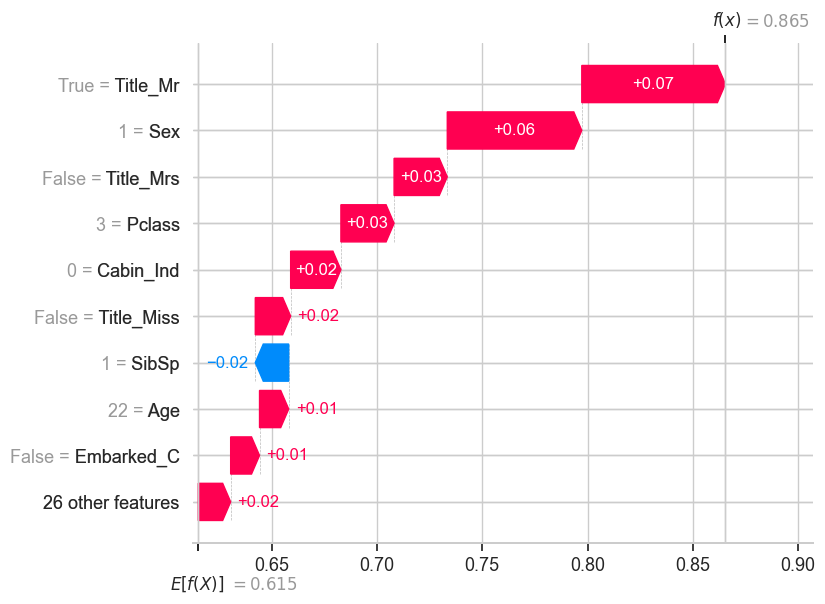

In [330]:
random_forest_model = RandomForestClassifier().fit(X, y)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)

random_forest_explainer = shap.Explainer(random_forest_model)

random_forest_shap_values = random_forest_explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(random_forest_shap_values[0, :, 0])

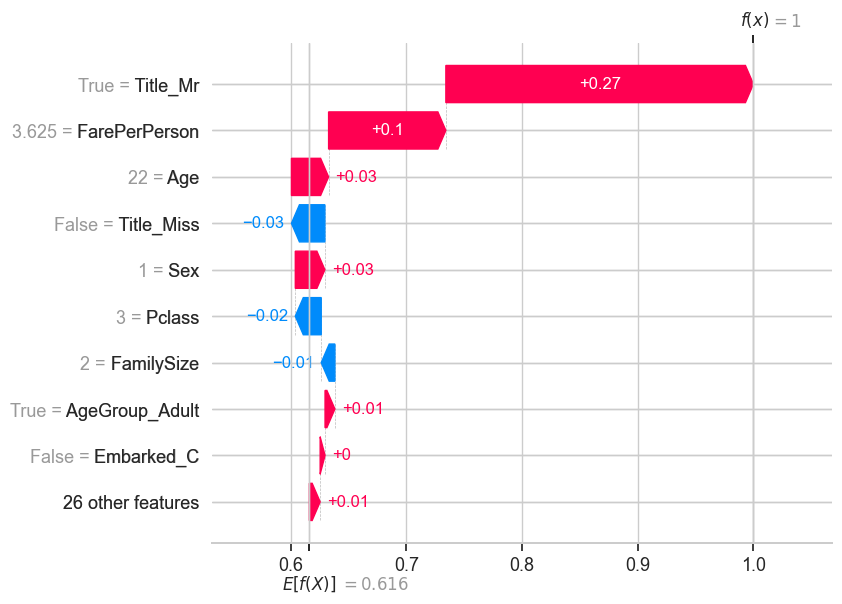

In [331]:
decision_tree_model = DecisionTreeClassifier().fit(X, y)
decision_tree_explainer = shap.Explainer(decision_tree_model)
decision_tree_shap_values = decision_tree_explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(decision_tree_shap_values[0, :, 0])

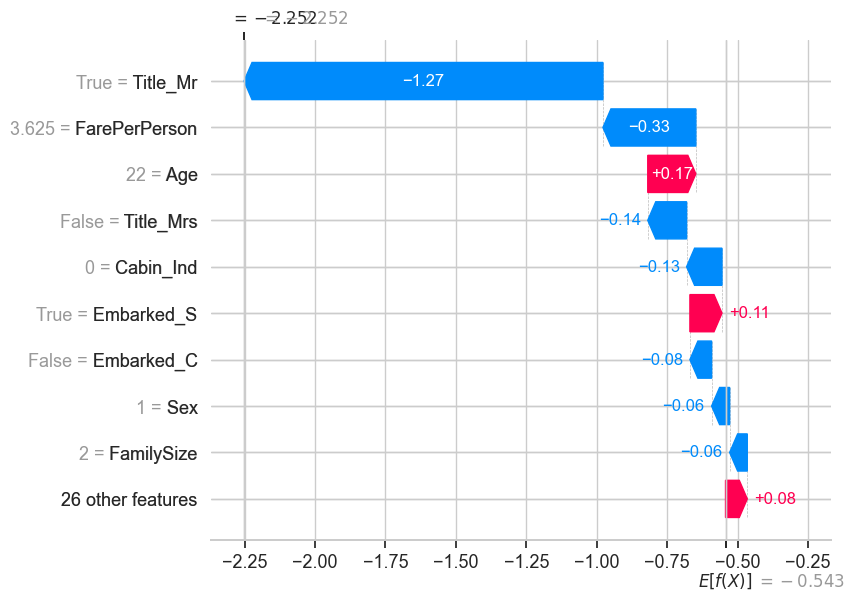

In [332]:
xgb_model = xgboost.XGBClassifier().fit(X, y)
xgb_explainer = shap.Explainer(xgb_model)
xgb_shap_values = xgb_explainer(X)

# visualize the first prediction's explanation
shap.plots.waterfall(xgb_shap_values[0])


##### **Save Model** [Here](https://)

In [333]:
# Save the model
import joblib
MODEL_PATH = os.getenv("MODEL_PATH", default="models/titanic_random_forest_model.pkl")

joblib.dump(random_forest, MODEL_PATH)


['models/titanic_random_forest_model.pkl']


1.   ##### ***Define a single /predict endpoint that takes JSON input, uses a pre-trained model to make predictions, and returns the predictions as a JSON response.***
2. ##### ***Set up the environment for running the Flask application in a Docker container by using a Python base image, copying the application files, installing dependencies, and defining the command to start the app.***